In [1]:
import pandas as pd

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import networkx as nx

import ast


In [2]:
# datos = pd.read_csv('data_movies/movies_metadata.csv', low_memory=False) #En casa
datos = pd.read_csv('/home/javi/Documents/Cursos/Redes complejas/Datasets_redes/movies_dataset/movies_metadata.csv', low_memory=False) #En oficina

--------
### Enlaces simples por genero, voto, etc

In [3]:
datos.keys()

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
datos['vote_average'] = pd.to_numeric(datos['vote_average'], errors='coerce')
datos['vote_average'] = datos['vote_average'].fillna(0)
datos['vote_average'] = datos['vote_average'].astype(int)


In [6]:
datos['release_date'] = pd.to_datetime(datos['release_date'], errors='coerce')
datos['year'] = datos['release_date'].dt.year.astype('Int64')
datos['year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45461    <NA>
45462    2011
45463    2003
45464    1917
45465    2017
Name: year, Length: 45466, dtype: Int64

In [7]:
data_corto = datos.sample(n=20, random_state=1)
edge_name = 'vote_average'
edge_name2 = 'genres'
edge_list = data_corto[edge_name]
edge_list2 = data_corto[edge_name2]

# data_corto

In [8]:
G = nx.Graph()
G2 = nx.Graph()

for title in data_corto['title']:
    G.add_node(title)
    G2.add_node(title)
    
print(f"Number of nodes in the graph: {G.number_of_nodes()}")

Number of nodes in the graph: 20


In [9]:
for title, edge_lab, edge_lab2 in zip(data_corto['title'], edge_list, edge_list2):
    if G.has_node(title):
        G.nodes[title][edge_name] = edge_lab
        genres_list = ast.literal_eval(edge_lab2)
        dic = genres_list[0]
        genero_principal = dic['name']
        G2.nodes[title]['genre'] = genero_principal 

for node in list(G.nodes(data=True))[:5]:
    print(node)

for node in list(G2.nodes(data=True))[:5]:
    print(node)

('The New Comics', {'vote_average': 5})
('China Girl', {'vote_average': 6})
('Snow Shark: Ancient Snow Beast', {'vote_average': 4})
('Penny Serenade', {'vote_average': 6})
('Iron And Silk', {'vote_average': 6})
('The New Comics', {'genre': 'Comedy'})
('China Girl', {'genre': 'Romance'})
('Snow Shark: Ancient Snow Beast', {'genre': 'Science Fiction'})
('Penny Serenade', {'genre': 'Drama'})
('Iron And Silk', {'genre': 'Drama'})


In [10]:
# Crear un diccionario para agrupar nodos por género
genre_dict = {}

for node, data in G2.nodes(data=True):
    genre = data.get('genre')
    if genre:
        if genre not in genre_dict:
            genre_dict[genre] = []
        genre_dict[genre].append(node)

print(genre_dict)

# Crear aristas entre nodos que comparten el mismo género
for genre, nodes in genre_dict.items():
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            G2.add_edge(nodes[i], nodes[j])

print(f"Number of edges in the graph after linking by genre: {G2.number_of_edges()}")


{'Comedy': ['The New Comics', 'The Last Band in Lebanon', '30 YEARS TO LIFE'], 'Romance': ['China Girl', 'Whitney'], 'Science Fiction': ['Snow Shark: Ancient Snow Beast'], 'Drama': ['Penny Serenade', 'Iron And Silk', 'Razend', 'Hungry Hill', 'Night and Fog', 'Bienvenido a casa'], 'Adventure': ['Lassie'], 'Music': ["Michael Jackson's Journey from Motown to Off the Wall"], 'Thriller': ['Badge 373', 'Zipper', 'The Employer'], 'Fantasy': ['Medium Raw'], 'Action': ['Paycheck'], 'Crime': ['The Aura']}
Number of edges in the graph after linking by genre: 22


In [11]:
label_dict = {}

for node, data in G.nodes(data=True):
    label = data.get('vote_average')
    if label:
        if label not in label_dict:
            label_dict[label] = []
        label_dict[label].append(node)

for label, nodes in label_dict.items():
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            G.add_edge(nodes[i], nodes[j])

print(f"Number of edges in the graph after linking by vote: {G.number_of_edges()}")

Number of edges in the graph after linking by vote: 39


Text(0.5, 1.0, 'Graph by Genre')

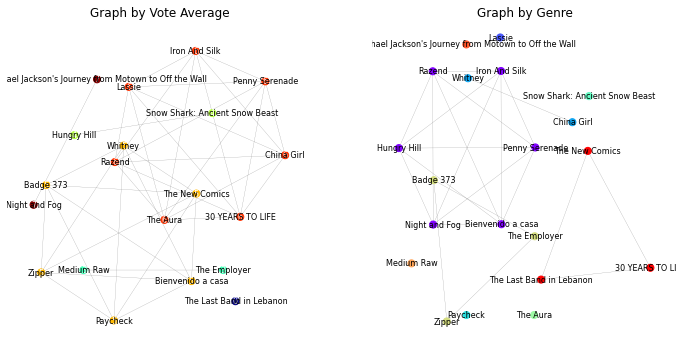

In [12]:
# Graficar grafo basado en 'vote_average'
cmap_vote_average = [G.nodes[node]['vote_average'] for node in G.nodes()]
colors_vote_average = plt.get_cmap('jet', max(cmap_vote_average) + 1)
cmap_vote_average = [colors_vote_average(value) for value in cmap_vote_average]

plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw_networkx_labels(G, pos=nx.kamada_kawai_layout(G), labels={node: G.nodes[node]['vote_average'] for node in G.nodes}, font_size=8, font_color='white')
nx.draw_kamada_kawai(G, with_labels=True, node_size=50, node_color=cmap_vote_average, edge_color='gray', width=0.2, font_size = 8)
plt.title('Graph by Vote Average')

# Graficar grafo basado en 'genre'
genre_labels = {genre: idx for idx, genre in enumerate(set(nx.get_node_attributes(G2, 'genre').values()))}
cmap_genre = [genre_labels[G2.nodes[node]['genre']] for node in G.nodes()]
colors_genre = plt.get_cmap('rainbow', len(genre_labels))
cmap_genre = [colors_genre(value) for value in cmap_genre]

plt.subplot(122)
# nx.draw_networkx_labels(G2, pos=nx.kamada_kawai_layout(G2), labels={node: G2.nodes[node]['genre'] for node in G2.nodes}, font_size=8)
nx.draw_kamada_kawai(G2, with_labels=True, node_size=50, node_color=cmap_genre, edge_color='gray', width=0.2, font_size = 8)
plt.title('Graph by Genre')

# plt.show()

In [13]:
# Obtener la lista de enlaces en G2
edges_G2 = list(G2.edges(data=True))
# print(edges_G2)

edges_G1 = list(G.edges(data=True))
# print(edges_G1)

# Comparar enlaces en ambos grafos
common_edges = set(G.edges()).intersection(set(G2.edges()))
print(f"Common edges in both graphs: {common_edges}")

Common edges in both graphs: {('Penny Serenade', 'Iron And Silk'), ('Iron And Silk', 'Razend'), ('Penny Serenade', 'Razend'), ('Badge 373', 'Zipper')}


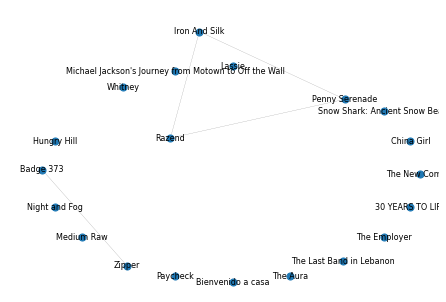

In [14]:
# Crear un nuevo grafo G3
G3 = nx.Graph()
G3.add_nodes_from(G.nodes(data=True))

# Añadir aristas comunes a G3
G3.add_edges_from(common_edges)


plt.figure()
nx.draw_kamada_kawai(G3, with_labels=True, node_size=50, edge_color='gray', width=0.2, font_size = 8)


---------
### Catacterizar por sustantivos en sinopsis

In [3]:
from textblob import TextBlob

In [21]:
# import nltk
# nltk.download('punkt_tab')
# nltk.download('brown')

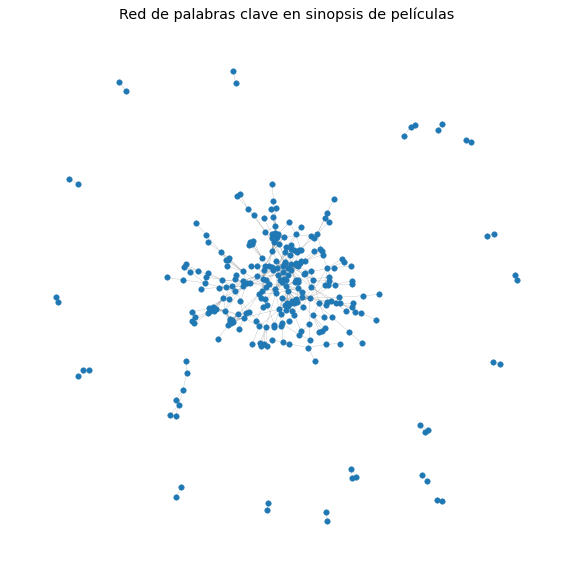

In [103]:
# Ojo con esto, este solo esta uniendo nodos segun sinopsis. Pero pierde info de titulo
# Quizas pueda reciclar la idea para armar algo bipartito con nodos que unen a palabras de sinopsis
# Esto podria ser con esta misma red pero agregando el atributo de titulo a cada nodo donde los nodos son pares de palabras repetidas

data_corto = datos.sample(n=500, random_state=1)
wc = data_corto['overview'].values

nouns = []
for n in wc:
    try:
        blob = TextBlob(n)
        nouns.append(blob.noun_phrases)
    except:
        # print(n)
        pass

#inicio un nuevo grafo G4 con nodos movies 
G4 = nx.Graph()

for noun in nouns:
    for m in nouns:
        if noun != m:
            for i in noun:
                if i in m:
                    G4.add_edge(str(noun), str(m))

                    

plt.figure(figsize=(10,10))
plt.title('Red de palabras sustantivos en sinopsis')
nx.draw_spring(G4, with_labels=False, node_size=30, edge_color='gray', width=0.2, font_size = 8)

Number of nodes in the graph: 500
Number of edges in the graph: 54


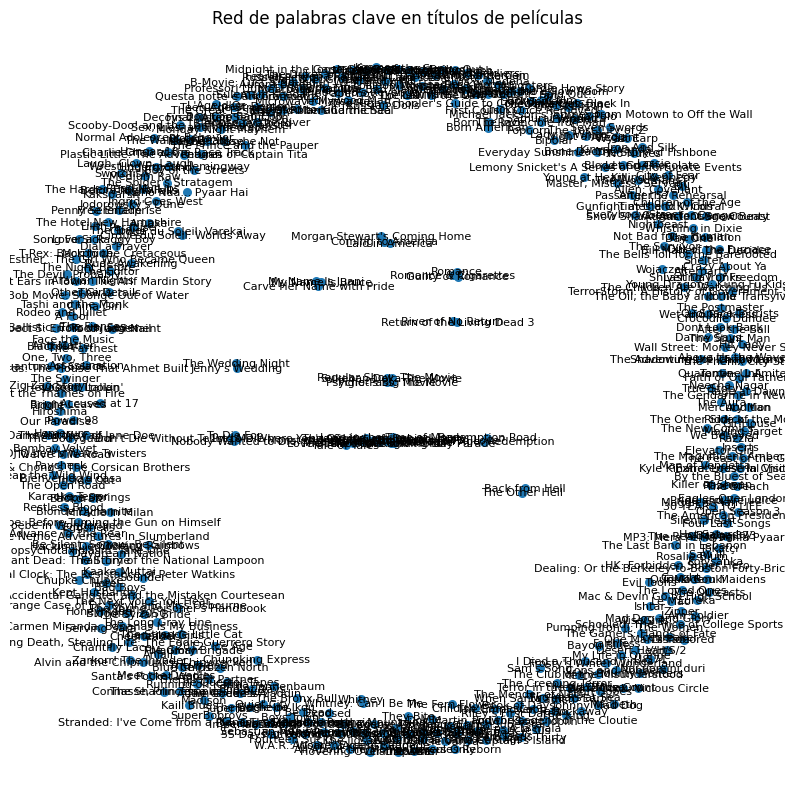

In [8]:
# Crear un nuevo grafo G6
dato_corto = datos.sample(n=500, random_state=1)
G6 = nx.Graph()

# Añadir nodos al grafo
for title in dato_corto['title']:
    G6.add_node(title)

# Extraer sustantivos de los títulos
title_nouns = {}
for title in dato_corto['title']:
    try:
        nouns = TextBlob(title).noun_phrases
        title_nouns[title] = set(nouns)
    except:
        title_nouns[title] = set()

# Añadir enlaces entre nodos que comparten sustantivos
for title1, nouns1 in title_nouns.items():
    for title2, nouns2 in title_nouns.items():
        if title1 != title2 and nouns1 & nouns2:
            G6.add_edge(title1, title2)

# Mostrar el número de nodos y enlaces en el grafo
print(f"Number of nodes in the graph: {G6.number_of_nodes()}")
print(f"Number of edges in the graph: {G6.number_of_edges()}")

# Graficar el grafo
plt.figure(figsize=(10, 10))
plt.title('Red de palabras clave en títulos de películas')
nx.draw_spring(G6, with_labels=True, node_size=30, edge_color='gray', width=0.2, font_size=8)
plt.show()

In [4]:
def armar_componente_gigante(Red):
  Conjunto_nodos_en_gigante = max(nx.connected_components(Red), key=len)
  Componente_Gigante = Red.subgraph(Conjunto_nodos_en_gigante).copy()
  return Componente_Gigante

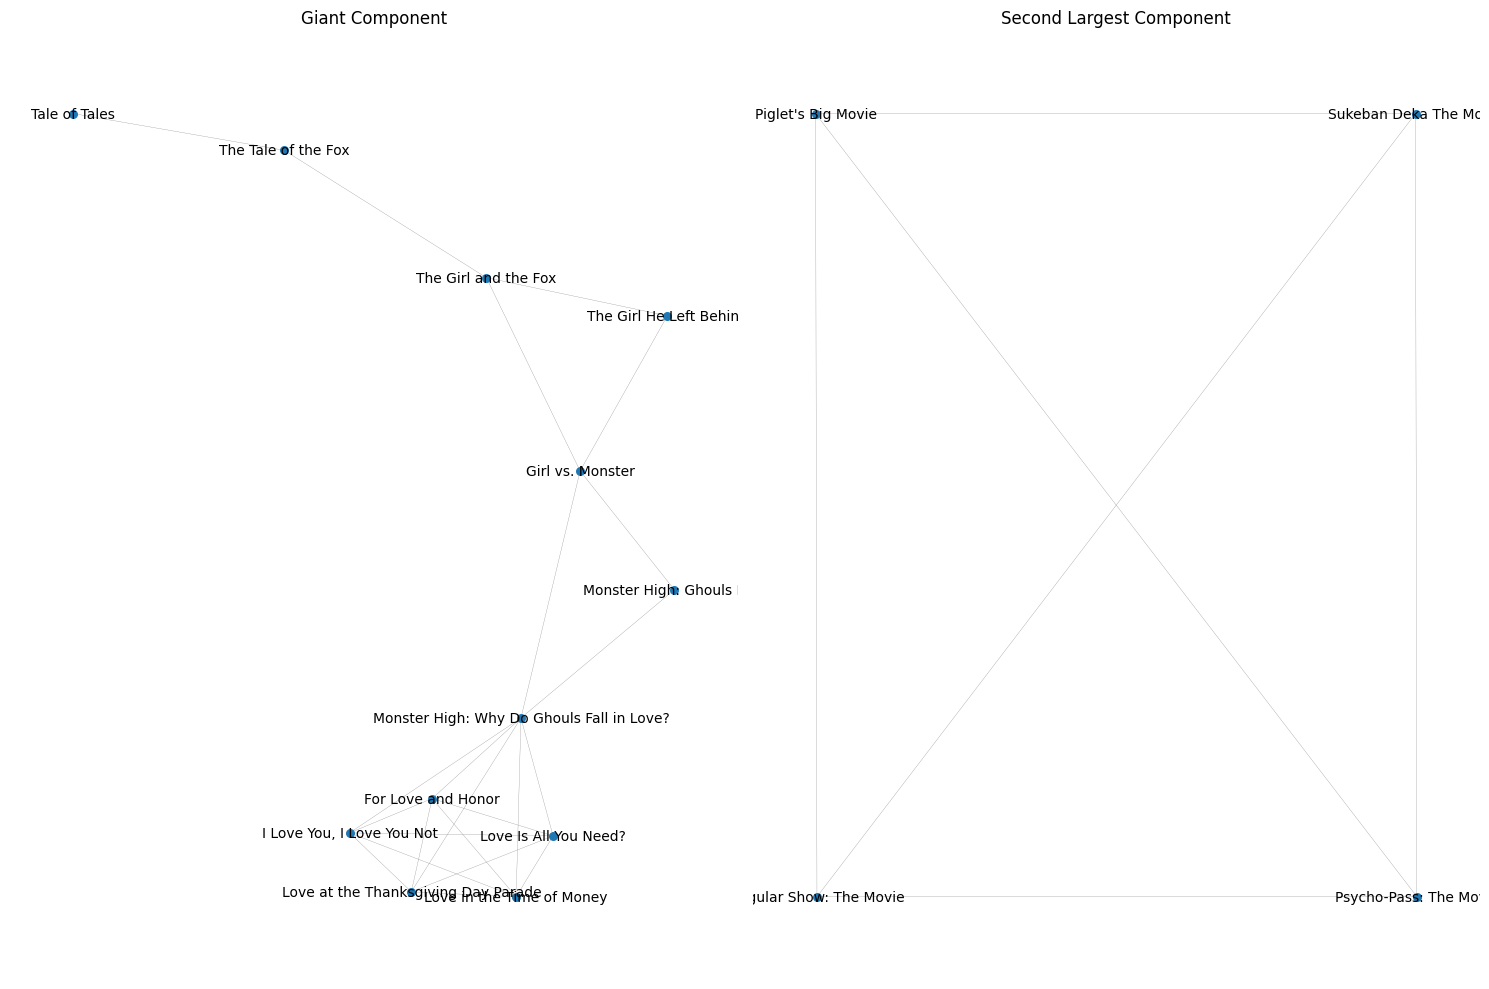

In [10]:
G_gigante = armar_componente_gigante(G6)
G_gigante.nodes(data=True)

componentes_ordenados = sorted(nx.connected_components(G6), key=len, reverse=True)
segundo_componente = componentes_ordenados[1]
segundo_componente

plt.figure(figsize=(15, 10))
plt.subplot(121)
nx.draw_spring(G_gigante, with_labels=True, node_size=30, edge_color='gray', width=0.2, font_size=10)
plt.title('Giant Component')

plt.subplot(122)
nx.draw_spring(G6.subgraph(segundo_componente), with_labels=True, node_size=30, edge_color='gray', width=0.2, font_size=10)
plt.title('Second Largest Component')

plt.tight_layout()
plt.show()

Number of nodes in the graph: 500
Number of edges in the graph: 598


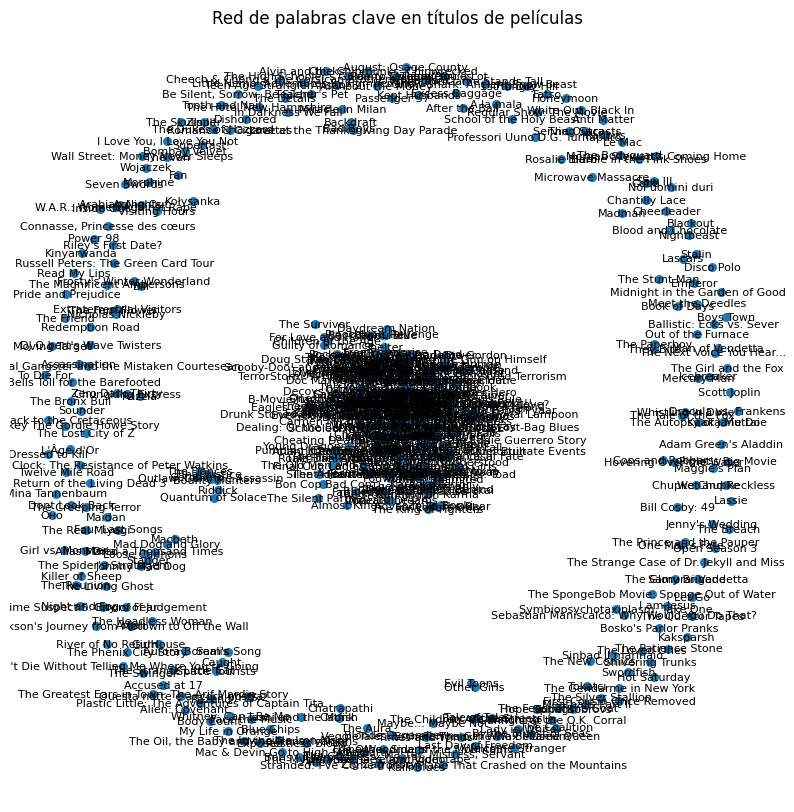

In [14]:
# Voy a intentar hacer por palabras en sinopsis pero que el enlace sea el titulo

# Crear un nuevo grafo G6
dato_corto = datos.sample(n=500, random_state=1)
G7 = nx.Graph()

# Añadir nodos al grafo
for title in dato_corto['title']:
    G7.add_node(title)

# Extraer sustantivos de los títulos
dic_nouns = {}
# for title in dato_corto['title']:
for index, fila in dato_corto.iterrows():
    # print(fila['title'])
    title = fila['title']
    sinop = fila['overview']
    try:
        nouns = TextBlob(sinop).noun_phrases
        dic_nouns[title] = set(nouns)
    except:
        dic_nouns[title] = set()

# print(dic_nouns)

# Añadir enlaces entre nodos que comparten sustantivos en sinopsis

for title1, nouns1 in dic_nouns.items():
    # print(title1)
    # print('aca', nouns1)
    for title2, nouns2 in dic_nouns.items():
        if title1 != title2:
            for nou in nouns1:
                # print(nou in nouns2)
                if nou in nouns2:
                    # print(title1, title2)
                    # print(nou, nouns2)

                    G7.add_edge(title1, title2) # Podria darle peso, si este enlace ya existe entonces peso +1 

# Mostrar el número de nodos y enlaces en el grafo
print(f"Number of nodes in the graph: {G7.number_of_nodes()}")
print(f"Number of edges in the graph: {G7.number_of_edges()}")

# Graficar el grafo
plt.figure(figsize=(10, 10))
plt.title('Red de palabras clave en títulos de películas')
nx.draw_spring(G7, with_labels=True, node_size=30, edge_color='gray', width=0.2, font_size=8)

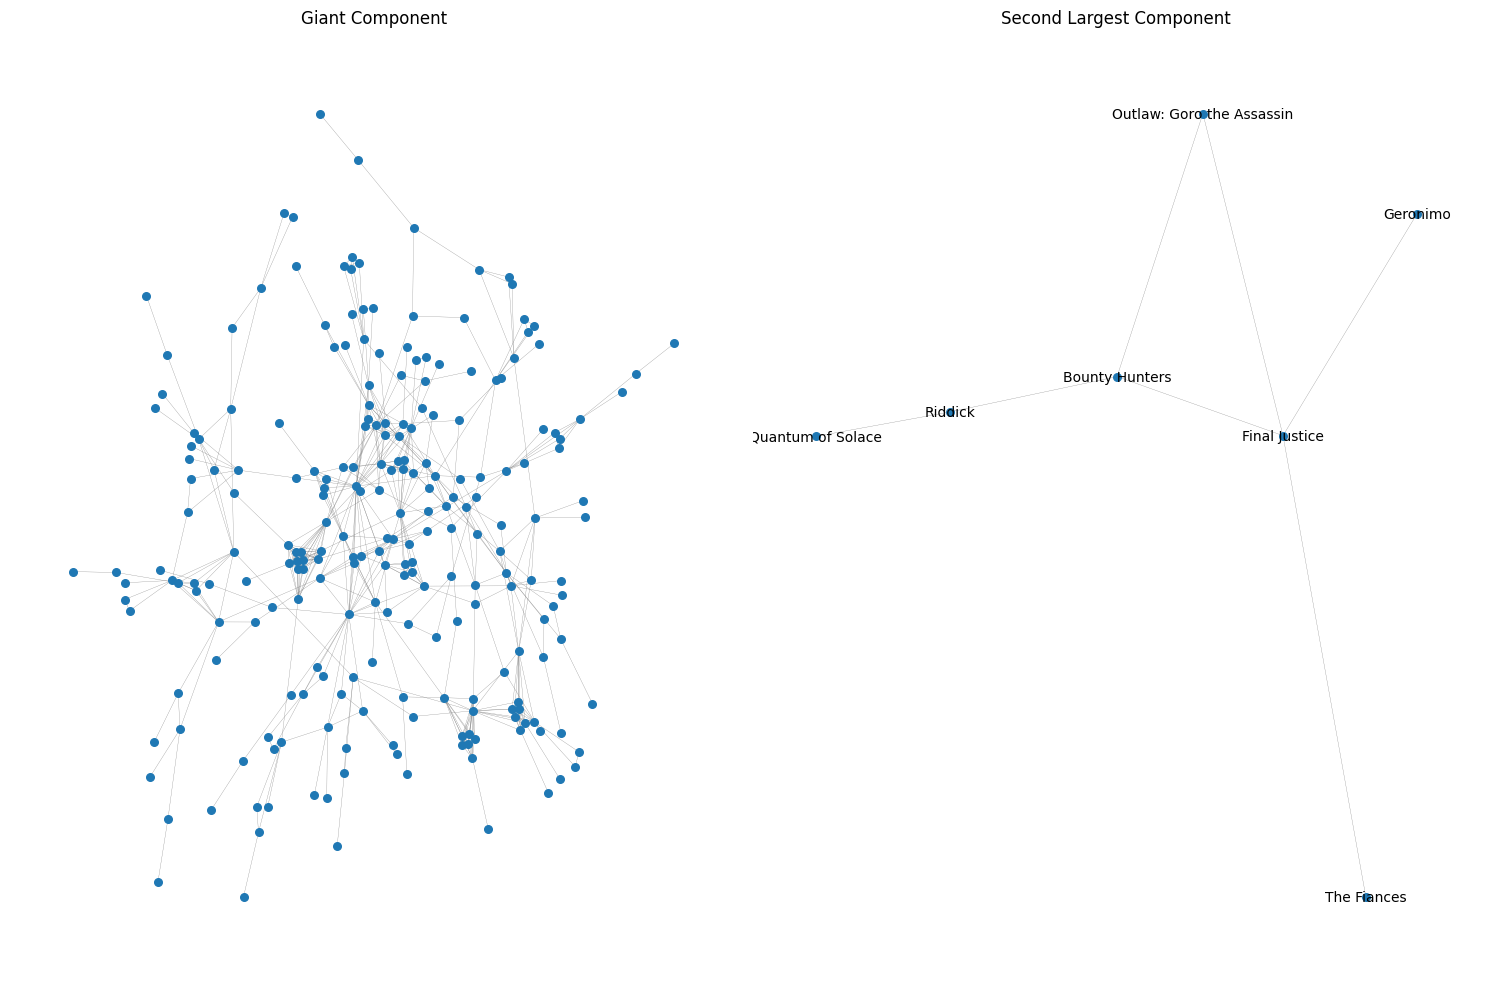

In [34]:
# Veo la componente gigante y la siguiente:
componentes_ordenados = sorted(nx.connected_components(G7), key=len, reverse=True)

G_gigante = componentes_ordenados[0]
segundo_componente = componentes_ordenados[1]

plt.figure(figsize=(15, 10))
plt.subplot(121)
nx.draw_spring(G7.subgraph(G_gigante), with_labels=False, node_size=30, edge_color='gray', width=0.2, font_size=10)
plt.title('Giant Component')

plt.subplot(122)
nx.draw_spring(G7.subgraph(segundo_componente), with_labels=True, node_size=30, edge_color='gray', width=0.2, font_size=10)
plt.title('Second Largest Component')

plt.tight_layout()

In [33]:
test1 = dato_corto[dato_corto['title'] == 'Final Justice']
test2 = dato_corto[dato_corto['title'] == 'Bounty Hunters']

test = pd.concat([test1, test2])

for a,b in test.iterrows():
    print(b['title'])
    dicc =  ast.literal_eval(b['genres'])
    genero = []
    for i in dicc:
        genero.append(i['name'])
    print(genero)
    print(b['overview'])
    print('-----------------')

Final Justice
['Action', 'Crime', 'Drama']
Due to his violent past, Deputy Sheriff Thomas Jefferson Geronimo III (Joe Don Baker) has been transferred to a rural outpost. When two thugs kill the sheriff, Geronimo shoots one of them, and the other vows revenge. Unfortunately for Geronimo, that thug turns out to be a mob boss, and the court orders Geronimo to extradite him back to his home in Sicily. When their plane is hijacked, the adversaries find their roles reversed.
-----------------
Bounty Hunters
['Action', 'Comedy', 'Thriller', 'Romance']
A group of down-on-their-luck bounty hunters hit the jackpot one night when they pick up an informant with a hundred thousand dollar bounty on his head. But their world is turned upside down when a mob boss offers them one million dollars in exchange for the informant. When they refuse, the mafia unleashes a trio of assassins on them who use all of their power to bring the bounty hunters down, and to get their man - dead or alive.
--------------

In [37]:
# Quiero tomar el nodo con mayor grado de vecinos 

max_degree = max(dict(G7.degree()).items(), key=lambda x: x[1])
print(max_degree)

# Veo los vecinos de este nodo
neigh = G7.neighbors(max_degree[0])
for n in neigh:
    print(n)



('Walt & El Grupo', 26)
Reagan
Hacking Democracy
Madison
Wrestling Ernest Hemingway
Neecha Nagar
Midnight FM
Hiroshima
Bright Leaves
K2
Bone Daddy
Saints and Soldiers
Everyday Sunshine:  The Story of Fishbone
Drunk Stoned Brilliant Dead: The Story of the National Lampoon
Inserts
Carmen Miranda: Bananas Is My Business
Laid in America
Monster High: Why Do Ghouls Fall in Love?
A Christmas Carol
Dane Cook: Vicious Circle
A Fool
True Story
Dragon Age: Redemption
Schooled: The Price of College Sports
Kyle Kinane: Loose in Chicago
Bienvenue à bord
Uncle Vanya


---------
### wordcloud

In [39]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
from os import path

wc = dato_corto['overview'].values


In [44]:
# mask = np.array(Image.open(path.join("/home/javi/Downloads/asd.jpg")))


In [40]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    # mask = mask,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(wc))

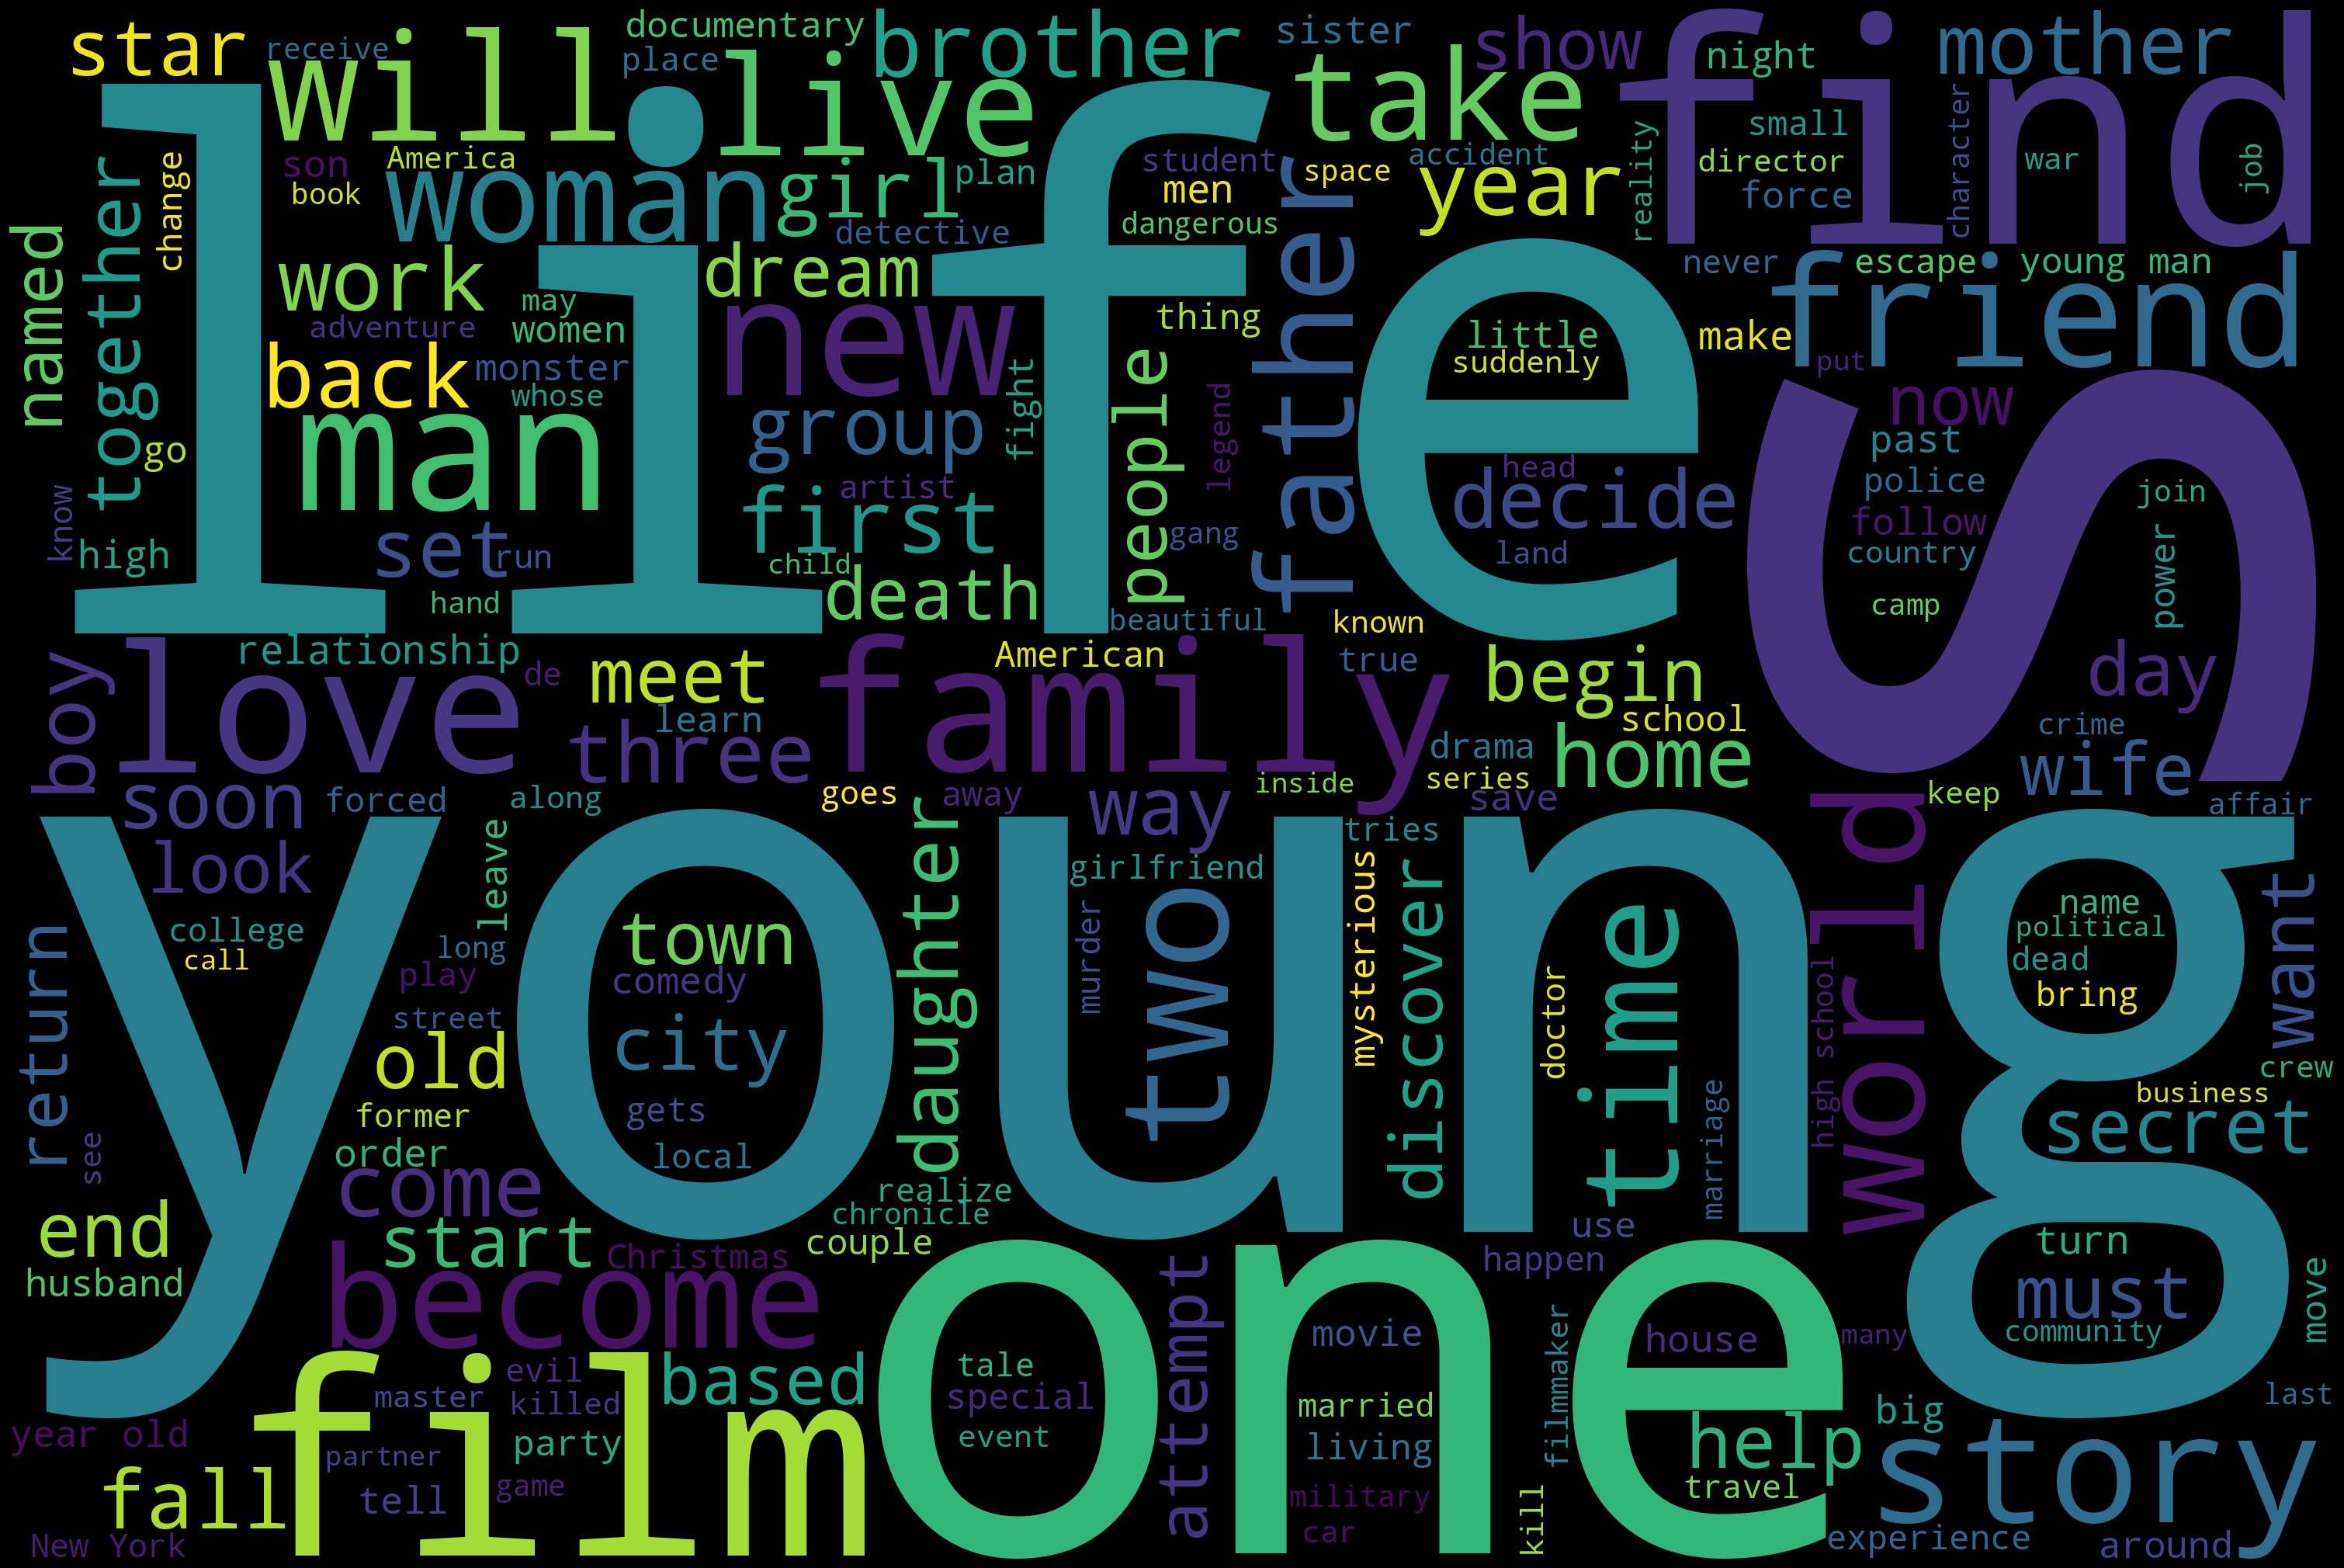

In [42]:
fig = plt.figure(figsize = (40, 20), facecolor = 'k', edgecolor = 'k')

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()